<a href="https://colab.research.google.com/github/JovanMilinkovic/StudentsPerformance/blob/main/StudentsPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Students = pd.read_csv('StudentsPerformance.csv')
Students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
Students.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
Students.info()
Students.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<Axes: xlabel='gender', ylabel='math score'>

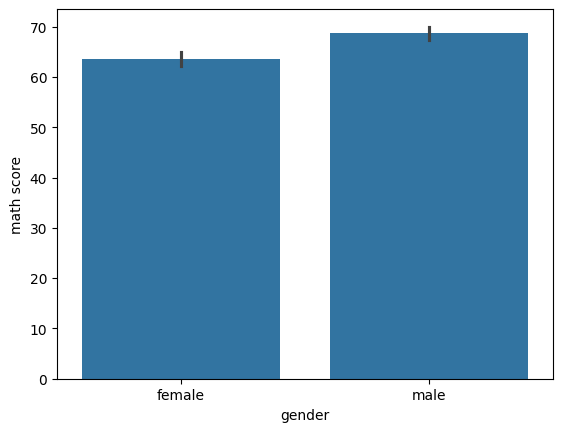

In [7]:
sns.barplot(data = Students, x = Students['gender'], y = Students['math score'])

<Axes: xlabel='writing score', ylabel='Count'>

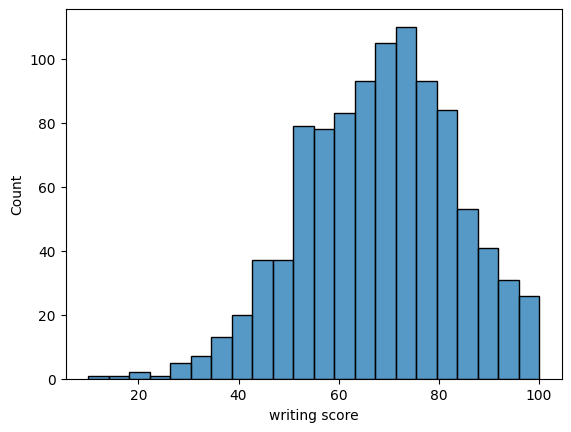

In [8]:
sns.histplot(data = Students, x = Students['writing score'])

In [10]:
Students['overall average'] = (Students['math score'] + Students['reading score'] + Students['writing score'])/3
Students['overall average']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: overall average, Length: 1000, dtype: float64

In [19]:
Students['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [21]:
Students['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [40]:
Students["test preparation course"]=Students["test preparation course"].replace("none",0)
Students["test preparation course"]=Students["test preparation course"].replace("completed",1)
Students["test preparation course"]

0      0
1      1
2      0
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    0
Name: test preparation course, Length: 1000, dtype: int64

In [24]:
# sns.heatmap(data = Students)
Students.corr()

<ipython-input-24-5d096af208a5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Students.corr()


,math score,reading score,writing score,overall average
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
overall average,0.918746,0.970331,0.965667,1.000000


In [28]:
Students = Students.drop('math score', axis = 1)

In [29]:
Students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,overall average
0,female,group B,bachelor's degree,standard,none,72,74,72.666667
1,female,group C,some college,standard,completed,90,88,82.333333
2,female,group B,master's degree,standard,none,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,49.333333
4,male,group C,some college,standard,none,78,75,76.333333
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,94.000000
996,male,group C,high school,free/reduced,none,55,55,57.333333
997,female,group C,high school,free/reduced,completed,71,65,65.000000
998,female,group D,some college,standard,completed,78,77,74.333333


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
X = Students.drop(['overall average','gender', 'race/ethnicity', 'parental level of education', 'lunch'], axis = 1)
y = Students['overall average']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [50]:
model.intercept_

2.2579153765532993

In [51]:
model.coef_

array([-0.46308733,  0.53527861,  0.42159927])